Introduccion:
Con el fin de analizar el impacto y tener en cuenta las condiciones que influyen en las personas a la hora de tomar transporte se llevara a cabo un analisis de datos para la toma de decisiones.

Se analizaran el numero de viajes por empresas de taxis, los lugares de origen, las condiciones climaticas,

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st 
from scipy.stats import levene

In [3]:
df_company=pd.read_csv('/datasets/project_sql_result_01.csv')
df_travel=pd.read_csv('/datasets/project_sql_result_04.csv')
df_result=pd.read_csv('/datasets/project_sql_result_07.csv')
 

In [4]:
print(df_company.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


Explicacion: Se carga la informacion para validar que datos tenemos disponibles.

In [5]:
print(df_travel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [6]:
print(df_travel.describe())

       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667


In [7]:
principales_travel=df_travel.sort_values(by='average_trips',ascending=False)
print(principales_travel.head(10))

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


Explicacion:Se revisan los datos que contienen el data frame, y se organizan por el promedio de numero de viajes.

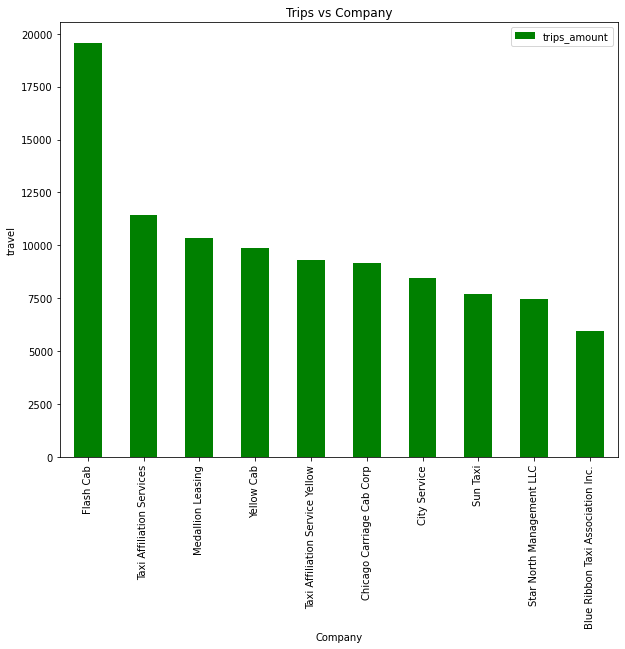

In [8]:
company_principales=df_company.head(10)
company_principales.plot(kind='bar',x='company_name',y='trips_amount',figsize=[10,8],title='Trips vs Company',xlabel='Company',ylabel='travel',color=['green'])
plt.show()

Explicacion:Se grafica el numero de viaje de cada compania de transporte, donde se visualiza cual es la empresa con mayor participacion.

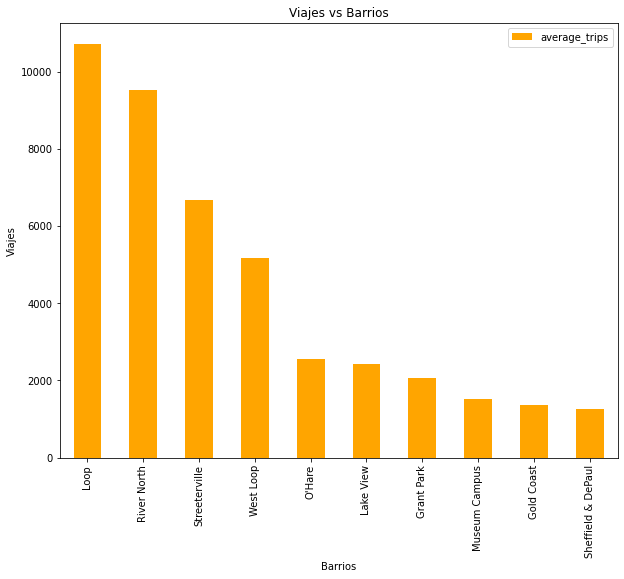

In [9]:
neigborhood_principales=df_travel.head(10)
neigborhood_principales.plot(kind='bar',x='dropoff_location_name',y='average_trips',figsize=[10,8],title='Viajes vs Barrios',xlabel='Barrios',ylabel='Viajes',color=['orange'])
plt.show()

Explicacion:Se visualiza el numero de viajes por barrio

In [10]:
df_result.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


Explicacion:Se verifican los datos que contiene el dataframe para verificar la informacion

In [11]:
condition_rain=df_result.query("weather_conditions=='Bad'")
condition_normal=df_result.query("weather_conditions=='Good'")
alpha=0.05
levene_statistic,prueba_levene=levene(condition_rain['duration_seconds'],condition_normal['duration_seconds'])
print(levene_statistic)
if prueba_levene<alpha:
    print('Varianzas diferentes') 
else:
     print('Varianzas similares')

0.38853489683656073
Varianzas similares


Explicacion: Se analiza si las varianzas para las condiciones del clima son similares

In [12]:
condition_rain=df_result.query("weather_conditions=='Bad'")
condition_normal=df_result.query("weather_conditions=='Good'")
alpha=0.05
result=st.ttest_ind(condition_rain['duration_seconds'],condition_normal['duration_seconds'],equal_var=True)
print('valor p:',result.pvalue)
if (result.pvalue<alpha):
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

valor p: 6.517970327099473e-12
Rechazamos la hipótesis nula


Explicacion: Se establece la hipotesis de si influye las condiciones del clima para tomar transporte, especificamente si la condicion es que los sabados lluviosos incrementan el numero de viajes desde el loop hasta el Aeropuerto.

De acuerdo al analisis que se realizo en las varianzas se determina que sus valores son similares por ende en la prueba de hipotesis la varianza se toma como igual.

Conclusiones generales:
    *Partiendo del numero de viajes por compania, y por barrios, la empresa de mayor participacion es Flash cab, siendo el origen mas comun Loop y River North.
    *Cuando las condiciones climaticas son malas porque esta lluvioso la duracion del viaje es mayor.